### Importación de datos



In [1]:
import pandas as pd
import csv
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict



url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

urls = {
    'Tienda 1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    'Tienda 2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    'Tienda 3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    'Tienda 4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}


tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
ventas_por_tienda = {}

for nombre, url in urls.items():
    total = 0.0
    with urllib.request.urlopen(url) as response:
        lines = [l.decode('utf-8') for l in response.readlines()]
        lector = csv.DictReader(lines)
        for fila in lector:
            try:
                precio = float(fila['Precio'])
                total += precio
            except (ValueError, KeyError):
                continue  # Ignora errores de conversión o ausencia de campo
    ventas_por_tienda[nombre] = total


In [27]:
print(" Ventas Totales (Precio):")
for tienda, total in ventas_por_tienda.items():
    print(f"{tienda}: ${total:,.2f}")

 Ventas Totales (Precio):
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


# 2. Ventas por categoría

In [4]:
ventas_por_categoria = defaultdict(float)

In [5]:
def procesar_csv_desde_url(url):
    with urllib.request.urlopen(url) as response:
        lines = [l.decode('utf-8') for l in response.readlines()]
        lector = csv.DictReader(lines)
        for fila in lector:
            categoria = fila['Categoría del Producto']
            try:
                precio = float(fila['Precio'])
            except ValueError:
                continue  # Ignora errores de conversión
            ventas_por_categoria[categoria] += precio

In [6]:
urls = ["https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv","https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv","https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv","https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"]

In [7]:
for url in urls:
    procesar_csv_desde_url(url)

In [8]:
ventas_ordenadas = sorted(ventas_por_categoria.items(), key=lambda x: x[1], reverse=True)

for categoria, total in ventas_ordenadas:
    print(f"{categoria}: ${total:.2f}")

Electrónicos: $1660576500.00
Electrodomésticos: $1324751100.00
Muebles: $757661000.00
Instrumentos musicales: $348772600.00
Deportes y diversión: $142977700.00
Juguetes: $73604400.00
Artículos para el hogar: $57579800.00
Libros: $37696100.00


# 3. Calificación promedio de la tienda


In [9]:
for i, url in enumerate(urls, 1):
    nombre_tienda = f"Tienda {i}"
    with urllib.request.urlopen(url) as response:
        lines = [l.decode('utf-8') for l in response.readlines()]
        lector = csv.DictReader(lines)

        suma_calificaciones = 0
        cantidad = 0

        for fila in lector:
            try:
                calificacion = float(fila['Calificación'])
                suma_calificaciones += calificacion
                cantidad += 1
            except (ValueError, KeyError):
                continue

        if cantidad > 0:
            promedio = suma_calificaciones / cantidad
            print(f"{nombre_tienda}: {promedio:.2f}")
        else:
            print(f"{nombre_tienda}: No hay calificaciones válidas")

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [10]:
categoria_top, total_top = ventas_ordenadas[0]
print(f"\nLa categoría más vendida fue '{categoria_top}' con ${total_top:.2f}")


La categoría más vendida fue 'Electrónicos' con $1660576500.00


In [11]:
categoria_top, total_top = ventas_ordenadas[len(ventas_ordenadas)-1]
print(f"\nLa categoría menos vendida fue '{categoria_top}' con ${total_top:.2f}")


La categoría menos vendida fue 'Libros' con $37696100.00


# 5. Envío promedio por tienda

In [19]:
envios_por_tienda = {}
for nombre_tienda, url in urls.items():
    cantidad_envios = 0
    with urllib.request.urlopen(url) as response:
        lines = [line.decode('utf-8') for line in response.readlines()]
        lector = csv.DictReader(lines)

        for fila in lector:
            try:
                costo = fila['Costo de envío']
                if costo.strip() != '':
                    cantidad_envios += 1
            except KeyError:
                continue

    envios_por_tienda[nombre_tienda] = cantidad_envios
    print(f"{nombre_tienda}: {cantidad_envios} envíos")

Tienda 1: 2359 envíos
Tienda 2: 2359 envíos
Tienda 3: 2359 envíos
Tienda 4: 2358 envíos


# 6. Vizualizacion
## Venta por categoria


In [20]:
# Extraer categorías y totales
categorias = [categoria for categoria, _ in ventas_ordenadas]
totales = [total for _, total in ventas_ordenadas]


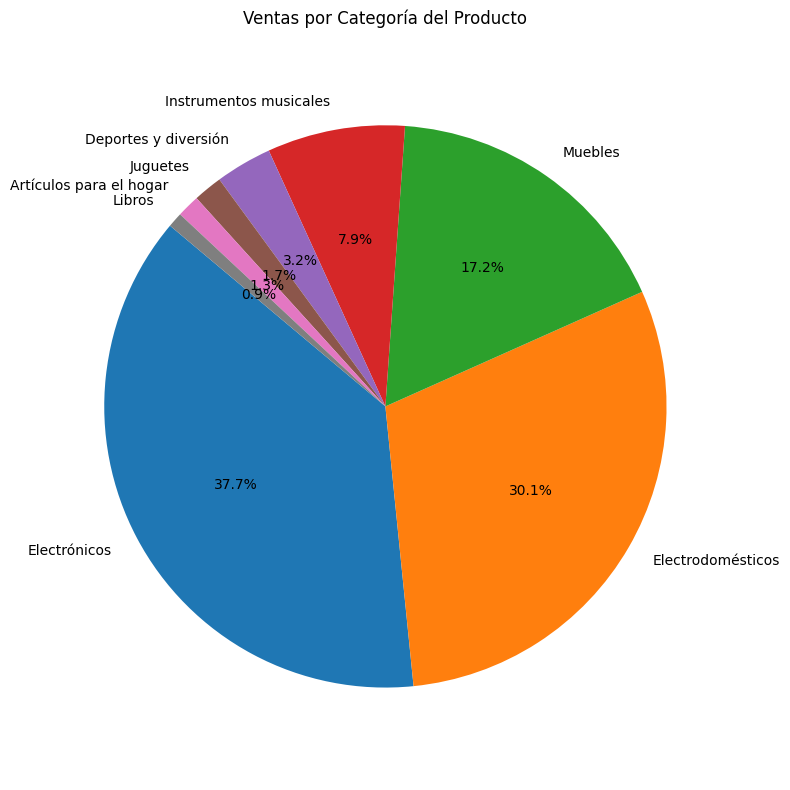

In [21]:
# Crear gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(totales, labels=categorias, autopct='%1.1f%%', startangle=140)
plt.title('Ventas por Categoría del Producto')
plt.axis('equal')
plt.tight_layout()
plt.show()



## Venta por tienda


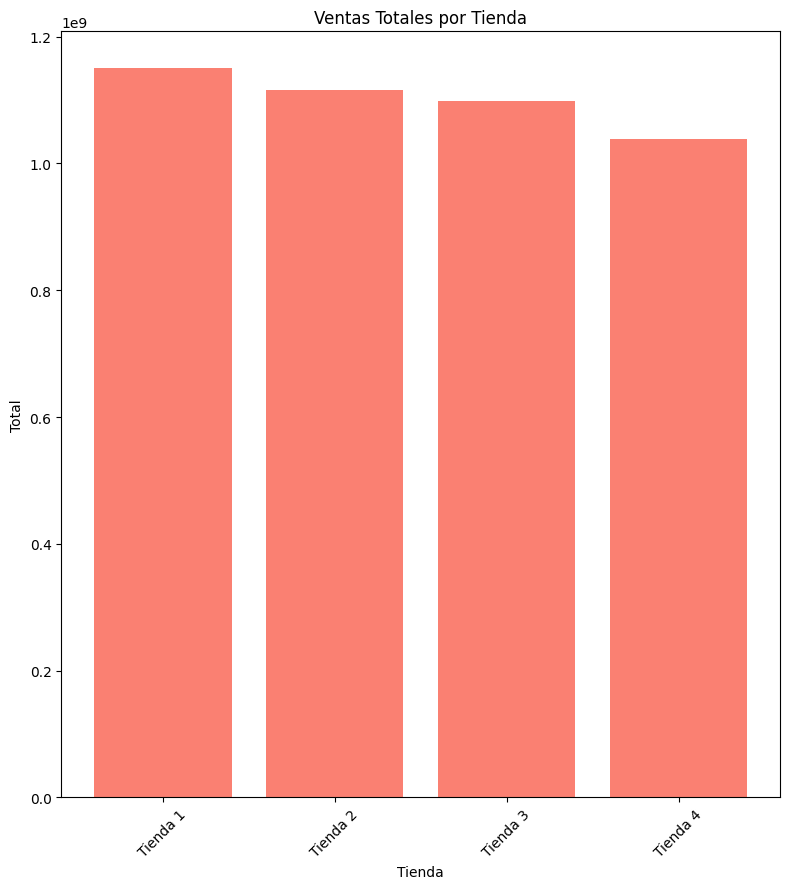

In [31]:
plt.figure(figsize=(8, 9))
plt.bar(ventas_por_tienda.keys(), ventas_por_tienda.values(), color='salmon')
plt.title('Ventas Totales por Tienda')
plt.ylabel('Total')
plt.xlabel('Tienda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Envios promedio por tienda


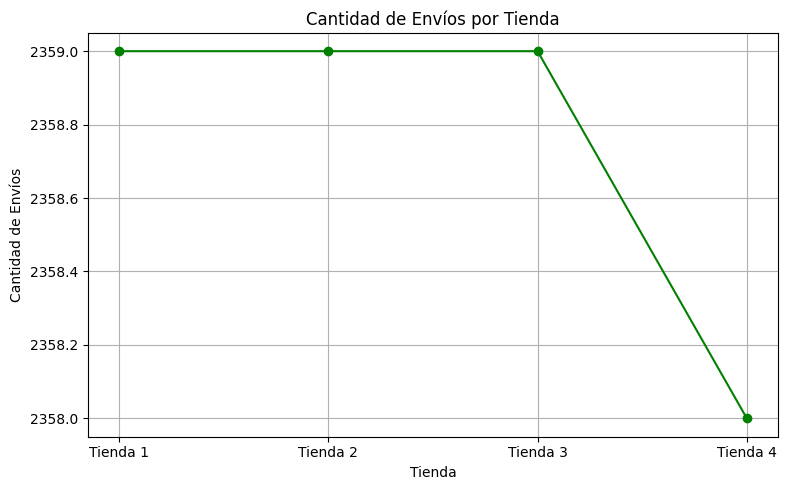

In [23]:
plt.figure(figsize=(8, 5))
tiendas = list(envios_por_tienda.keys())
valores = list(envios_por_tienda.values())

plt.plot(tiendas, valores, marker='o', linestyle='-', color='green')
plt.title('Cantidad de Envíos por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Envíos')
plt.grid(True)
plt.tight_layout()
plt.show()

##Ventas de mayor y menor categoria por tienda

In [24]:
tiendas = []
ventas_menor = []
ventas_mayor = []
categorias_menor = []
categorias_mayor = []

In [25]:
for tienda, url in urls.items():
    ventas_por_categoria = {}

    with urllib.request.urlopen(url) as response:
        lines = [line.decode('utf-8') for line in response.readlines()]
        lector = csv.DictReader(lines)

        for fila in lector:
            try:
                categoria = fila['Categoría del Producto']
                precio = float(fila['Precio'])
                ventas_por_categoria[categoria] = ventas_por_categoria.get(categoria, 0) + precio
            except (ValueError, KeyError):
                continue

    if not ventas_por_categoria:
        continue

    # Categorías más y menos vendidas
    cat_mayor = max(ventas_por_categoria, key=ventas_por_categoria.get)
    cat_menor = min(ventas_por_categoria, key=ventas_por_categoria.get)

    # Guardar datos para el gráfico
    tiendas.append(tienda)
    ventas_mayor.append(ventas_por_categoria[cat_mayor])
    ventas_menor.append(ventas_por_categoria[cat_menor])
    categorias_mayor.append(cat_mayor)
    categorias_menor.append(cat_menor)

    # Mostrar en consola
    print(f"\n {tienda}")
    print(f"🔻 Categoría MENOS vendida: {cat_menor} - ${ventas_por_categoria[cat_menor]:,.2f}")
    print(f"🔺 Categoría MÁS vendida: {cat_mayor} - ${ventas_por_categoria[cat_mayor]:,.2f}")


 Tienda 1
🔻 Categoría MENOS vendida: Libros - $8,784,900.00
🔺 Categoría MÁS vendida: Electrónicos - $429,493,500.00

 Tienda 2
🔻 Categoría MENOS vendida: Libros - $10,091,200.00
🔺 Categoría MÁS vendida: Electrónicos - $410,831,100.00

 Tienda 3
🔻 Categoría MENOS vendida: Libros - $9,498,700.00
🔺 Categoría MÁS vendida: Electrónicos - $410,775,800.00

 Tienda 4
🔻 Categoría MENOS vendida: Libros - $9,321,300.00
🔺 Categoría MÁS vendida: Electrónicos - $409,476,100.00


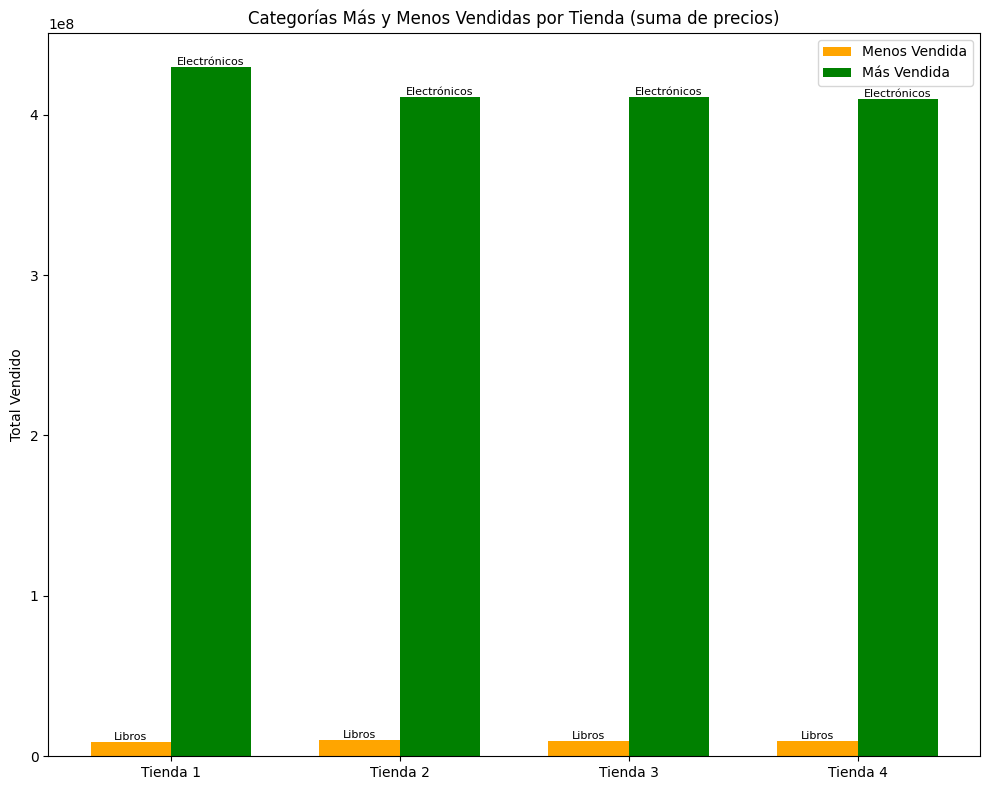

In [32]:
# Gráfico de barras agrupadas
x = np.arange(len(tiendas))
width = 0.35

plt.figure(figsize=(10, 8))
plt.bar(x - width/2, ventas_menor, width, label='Menos Vendida', color='orange')
plt.bar(x + width/2, ventas_mayor, width, label='Más Vendida', color='green')

# Añadir etiquetas de categorías
for i in range(len(tiendas)):
    plt.text(x[i] - width/2, ventas_menor[i], categorias_menor[i], ha='center', va='bottom', fontsize=8, rotation=0)
    plt.text(x[i] + width/2, ventas_mayor[i], categorias_mayor[i], ha='center', va='bottom', fontsize=8, rotation=0)

plt.xticks(x, tiendas)
plt.ylabel('Total Vendido')
plt.title('Categorías Más y Menos Vendidas por Tienda (suma de precios)')
plt.legend()
plt.tight_layout()
plt.show()

# 7. Informe final

**Informe Final**

**Introducción.**

El presente informe tiene como objetivo realizar un análisis integral del desempeño comercial de cuatro tiendas que cuentan con un amplio inventario y una diversidad de categorías de productos. A partir de los datos suministrados, se evaluaron variables clave como volumen de ventas, rendimiento por categoría, frecuencia de envíos y calificaciones de los clientes.
El propósito principal de este análisis es identificar la tienda con el menor nivel de ingresos y establecer, con base en criterios objetivos, una recomendación fundamentada sobre cuál de las tiendas presenta menor viabilidad operativa y podría ser considerada para su posible venta o desinversión estratégica.

Tras realizar un análisis detallado utilizando la información proporcionada, se han identificado los principales factores relacionados con el desempeño de cada tienda. A continuación, se resumen los hallazgos más relevantes:


**•	Ventas Totales:**

La tienda con el mayor volumen de ventas fue la Tienda 1, mientras que la de menor facturación fue la Tienda 2. La diferencia de ingresos entre ambas asciende a $112,504,700.00.

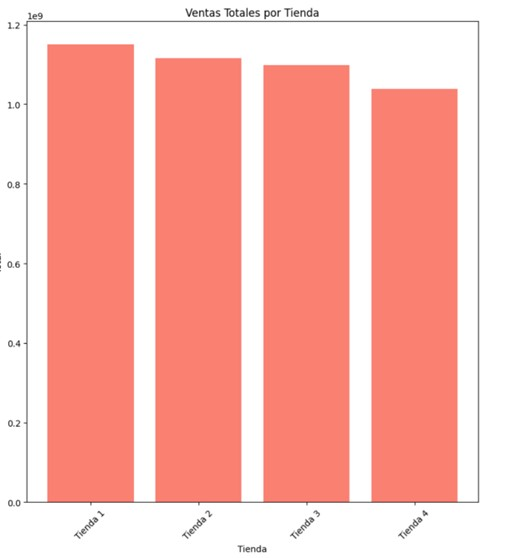



**•	Categoría más vendida:**
En todas las tiendas, la categoría con mayor demanda fue Electrónica. La Tienda 1 destacó como la que más vendió dentro de esta categoría, mientras que la Tienda 4 fue la que reportó la menor venta de productos electrónicos.

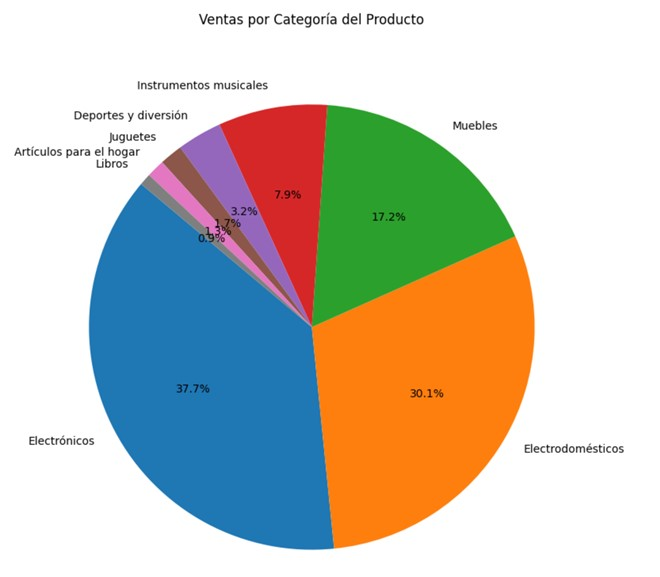


**•	Categoría menos vendida:**
La categoría con menor volumen de ventas fue Libros. En este caso, la Tienda 1 fue la que registró la menor venta en esta categoría, y la Tienda 2 la que reportó la mayor.

 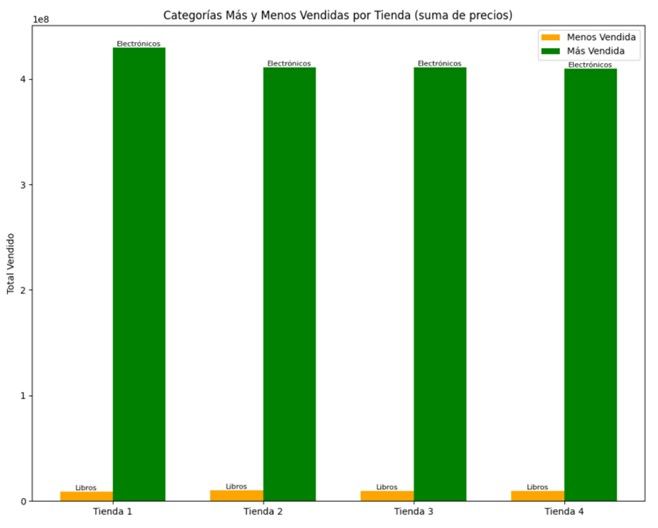


**•	Volumen de envíos por tienda:**
Las Tiendas 1, 2 y 3 realizaron la misma cantidad de envíos. La Tienda 4 tuvo una ligera diferencia, con un envío menos en comparación con las demás.

**•	Calificación promedio por tienda:**
El análisis de las calificaciones otorgadas por los clientes muestra que la Tienda 3 obtuvo la mayor puntuación promedio, mientras que la Tienda 1 fue la que recibió la más baja. La diferencia entre ambas fue de 0.07 puntos.

**Conclusión:**

De acuerdo con los resultados obtenidos, se recomienda considerar la venta o cierre de la Tienda 4. Esta tienda no solo presentó el menor número de envíos y un bajo desempeño en la categoría más relevante (Electrónica), sino que además no se destacó positivamente en ningún aspecto relevante del análisis. Su rendimiento general sugiere una baja rentabilidad y poco potencial de crecimiento en comparación con las demás tiendas evaluadas.


